In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.patches as mpatches
import seaborn as sns

df = pd.read_csv("/content/drive/MyDrive/datamodel/covertype.csv")

## 1.Distribution of cover_type across different wilderness_type

In [3]:
# print(df.shape)
#print(df.info())
# grouped = df.groupby(['cover_type', 'wilderness_type']).size().unstack()
grouped = df.groupby(['wilderness_type', 'cover_type']).size().unstack()
grouped

cover_type,Aspen,Cottonwood/Willow,Douglas-fir,Krummholz,Lodgepole Pine,Ponderosa Pine,Spruce/Fir
wilderness_type,,,,,,,
Cache la Poudre,NaN,2747.0,9741.0,NaN,3026.0,21454.0,NaN
Comanche Peak,5712.0,NaN,7626.0,13105.0,125093.0,14300.0,87528.0
Neota,NaN,NaN,NaN,2304.0,8985.0,NaN,18595.0
Rawah,3781.0,NaN,NaN,5101.0,146197.0,NaN,105717.0


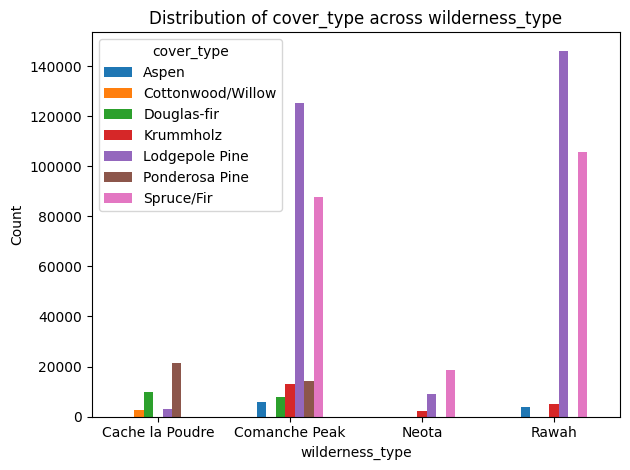

In [4]:

grouped.plot(kind='bar')

plt.title('Distribution of cover_type across wilderness_type')
plt.xlabel('wilderness_type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# 2.Distribution of elevation on each cover type

(array([1, 2, 3, 4, 5, 6, 7]),
 [Text(1, 0, 'Aspen'),
  Text(2, 0, 'Cottonwood/Willow'),
  Text(3, 0, 'Douglas-fir'),
  Text(4, 0, 'Krummholz'),
  Text(5, 0, 'Lodgepole Pine'),
  Text(6, 0, 'Ponderosa Pine'),
  Text(7, 0, 'Spruce/Fir')])

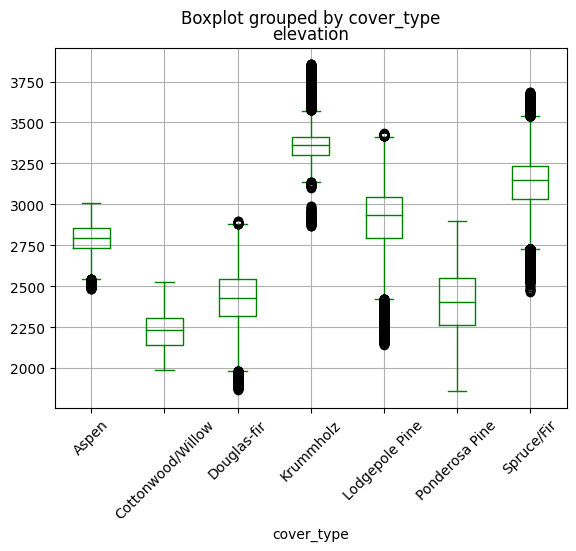

In [5]:
df.boxplot(column='elevation', by='cover_type', grid=True, color="green")
plt.xticks(rotation=45)


# 3.Number of data points on each climatic zone

In [6]:
grouped = df.groupby(['climatic_zone'])['index'].count().sort_values(ascending=True)
# print(grouped.index)
# print(grouped.value)
for index,value in enumerate(grouped.values):
    print(index)
    print(value)

0
284
1
602
2
8166
3
35947
4
40437
5
93593
6
401983


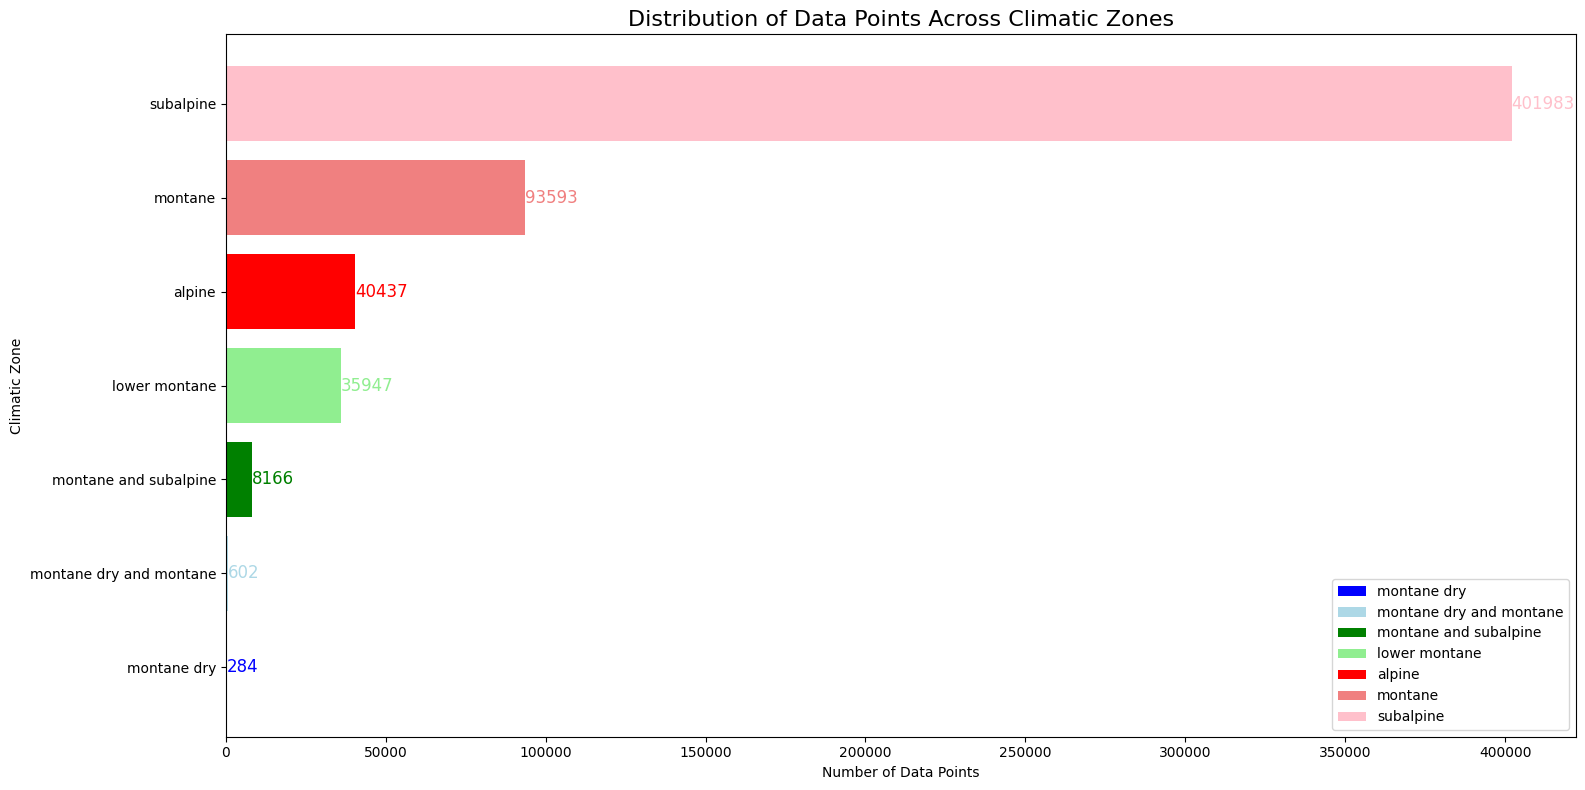

In [7]:
# grouped index = Index(['montane dry', 'montane dry and montane', 'montane and subalpine','lower montane', 'alpine', 'montane', 'subalpine'], dtype='object', name='climatic_zone')
# grouped values = [   284    602   8166  35947  40437  93593 401983]

plt.figure(figsize=(16, 8))

colors = ["blue", "lightblue", "green", "lightgreen", "red", "lightcoral", "pink"]

for index, (climatic_zones, value) in enumerate(grouped.items()):
    plt.barh(climatic_zones, value, color=colors[index], label=climatic_zones)
    plt.text(value, index, value, ha='left', va='center', fontsize=12, color=colors[index])

plt.title('Distribution of Data Points Across Climatic Zones', fontsize=16)
plt.xlabel('Number of Data Points')
plt.ylabel('Climatic Zone')
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


# 4.Which cover type dominates subalpine climate?
Ans: Lodgepole Pine dominates subalpine climate

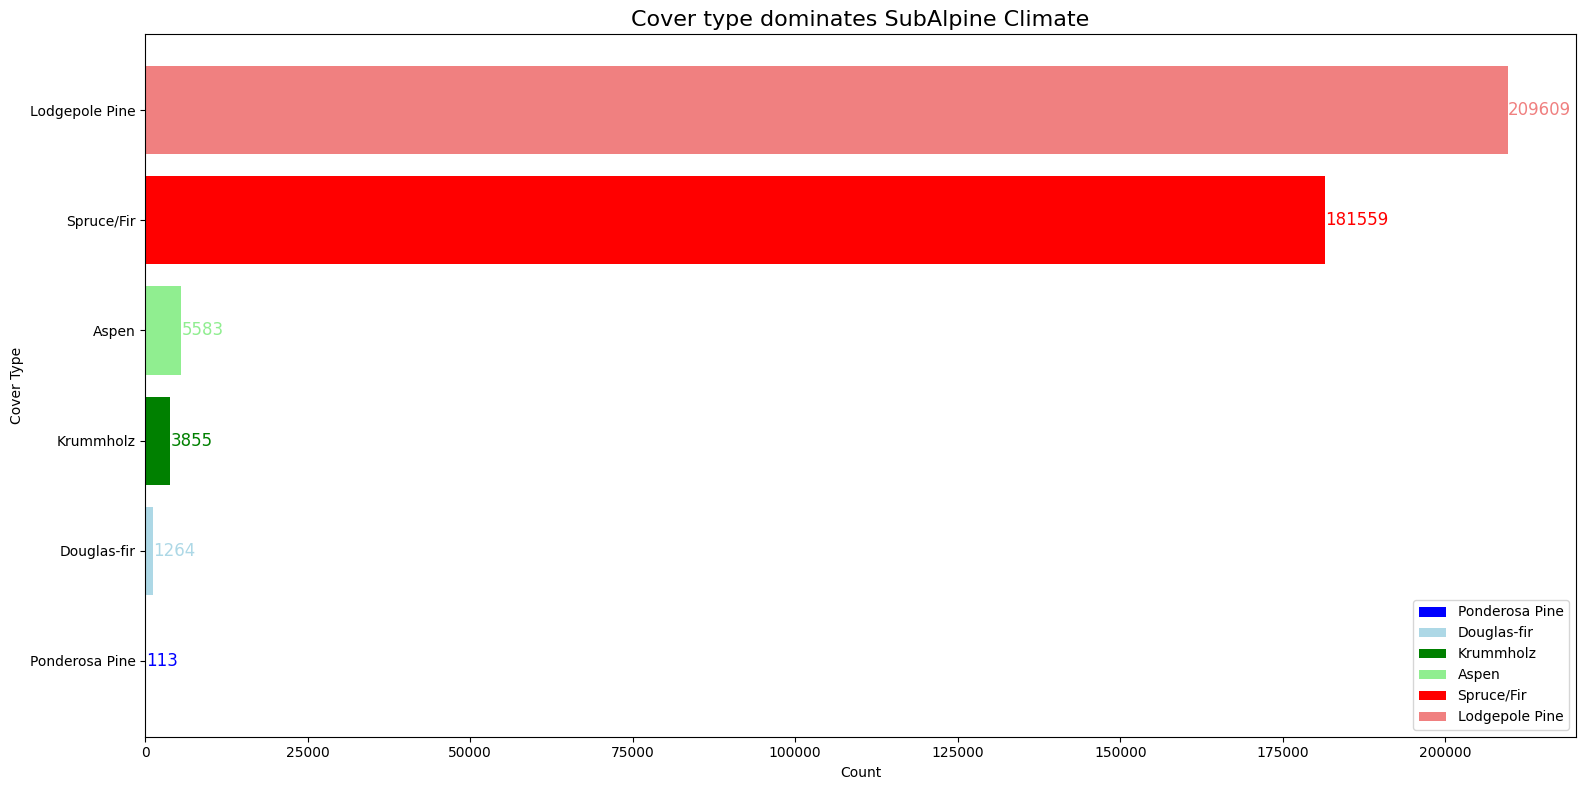

In [8]:

subAlpine = df[df["climatic_zone"] == "subalpine"]

covertType = subAlpine["cover_type"].value_counts().sort_values(ascending=True)

plt.figure(figsize=(16, 8))

colors = ["blue", "lightblue", "green", "lightgreen", "red", "lightcoral", "pink"]


for index, (key, value) in enumerate(covertType.items()):
    plt.barh(key, value, label=key,  color=colors[index])
    plt.text(value, index, value, ha='left', va='center', fontsize=12, color=colors[index])

    # plt.barh(covertType.index, covertType.values)

plt.title('Cover type dominates SubAlpine Climate', fontsize=16)
plt.xlabel('Count')
plt.ylabel('Cover Type')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

# 5.Which cover type is likely to be found near a body of water?
Ans : Spure/Fir is likely to be found near a body of water


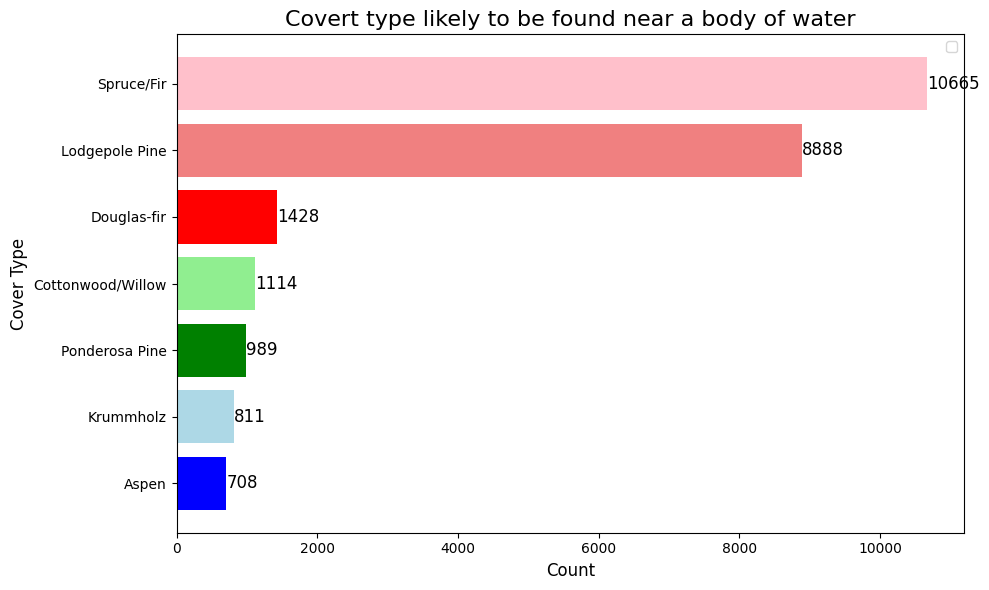

In [9]:
filter = df[(df["horizontal_distance_to_hydrology"] <= 25) & (df["vertical_distance_to_hydrology"] <= 25)][["horizontal_distance_to_hydrology", "vertical_distance_to_hydrology", "cover_type"]]

data = filter["cover_type"].value_counts().sort_values(ascending=True)

plt.figure(figsize=(10, 6))

colors = ["blue", "lightblue", "green", "lightgreen", "red", "lightcoral", "pink"]

for index, (key, value) in enumerate(data.items()):
    plt.barh(key, value, color=colors[index])
    plt.text(value, index, value, ha='left', va='center', fontsize=12)

plt.title('Covert type likely to be found near a body of water', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Cover Type', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

## 6.Which cover type is likely to be found in a shady area from 9 am to noon?
Ans:  Cover type of Ponderosa  Pine is likely to be found in a shady area from 9 am to noon

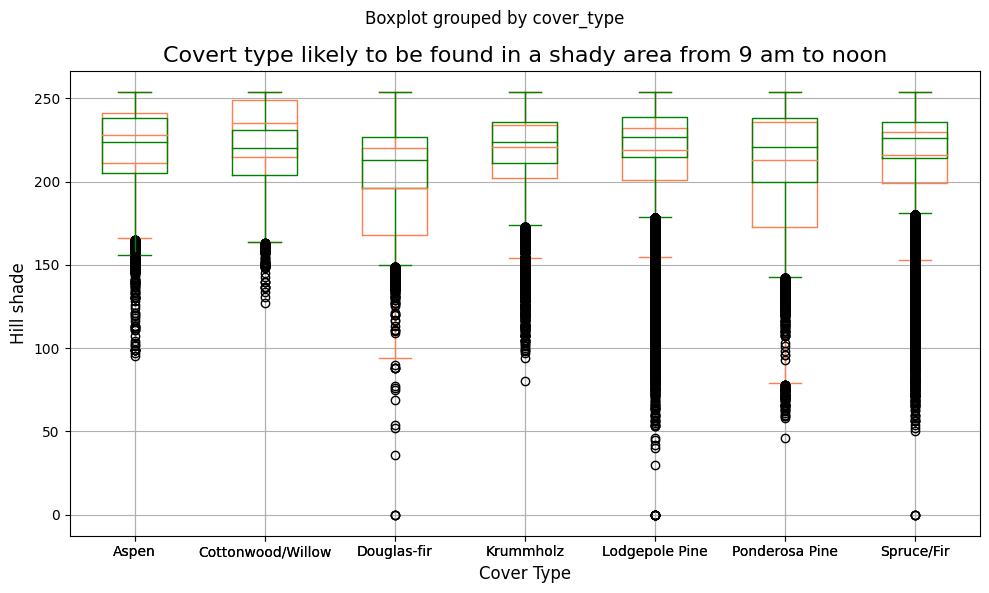

In [10]:
# filter = df[(df["hillshade_9am"] <= 200) & (df["hillshade_noon"] <= 200)]

# data = filter["cover_type"].value_counts().sort_values(ascending=True)

# plt.figure(figsize=(10, 6))

# plt.barh(data.index, data.values)

# for index, value in enumerate(data.values):
#     plt.text(value, index, value, ha='left', va='center', fontsize=12)

# plt.title('Cover type likely to be found in shady area from 9am to noon', fontsize=16)
# plt.xlabel('Count', fontsize=12)
# plt.ylabel('Cover Type', fontsize=12)

# plt.tight_layout()
# plt.show()

# df.boxplot(column=['hillshade_9am', 'hillshade_noon'], by='cover_type', grid=True, rot=45)
# df.boxplot(column='hillshade_9am', by='cover_type', grid=True, rot=45)
# df.boxplot(column='hillshade_noon', by='cover_type', grid=True, rot=45)

ig, ax = plt.subplots(figsize=(10, 6))

box1 = df.boxplot(column='hillshade_9am', by='cover_type', color='coral', grid=True, ax=ax)
box1.set_title('')

box2 = df.boxplot(column='hillshade_noon', by='cover_type', color='green', grid=True, ax=ax)
box2.set_title('')

plt.title('Covert type likely to be found in a shady area from 9 am to noon', fontsize=16)
plt.xlabel('Cover Type', fontsize=12)
plt.ylabel('Hill shade', fontsize=12)
plt.tight_layout()



#7. Which cover type is likely to be found away from hazardous points (roadways/firepoints)?

Ans: Lodgepole is likely to be found away from hazardous point

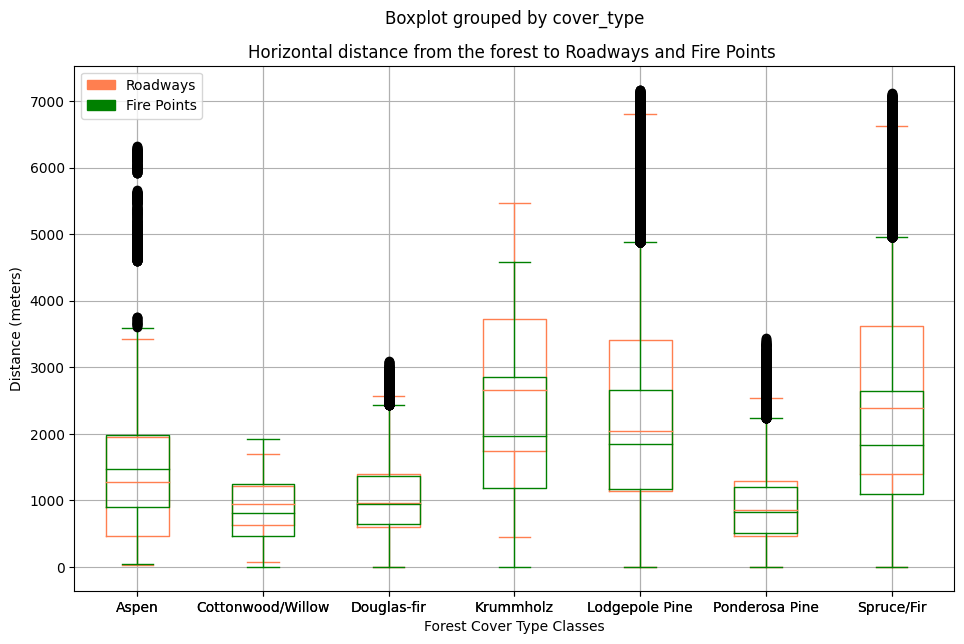

In [11]:
import matplotlib.patches as mpatches

ig, ax = plt.subplots(figsize=(11, 7))
box1 = df.boxplot(column='horizontal_distance_to_roadways', by='cover_type',grid=True, color='coral',ax=ax)
box2 = df.boxplot(column='horizontal_distance_to_fire_points', by='cover_type',grid=True, color='green',ax=ax)

plt.title('Horizontal distance from the forest to Roadways and Fire Points ')
plt.xlabel('Forest Cover Type Classes')
plt.ylabel('Distance (meters)')

rw_patch = mpatches.Patch(color='coral', label='Roadways')
fr_patch = mpatches.Patch(color='green', label='Fire Points')
plt.legend(handles=[rw_patch, fr_patch])
plt.show()

# 8. Determine whether elevation provides more information to distinguish Krummholz from Cottonwood/Willow than horizontal_distance_to_hydrology ?

Text(0, 0.5, 'Elevation')

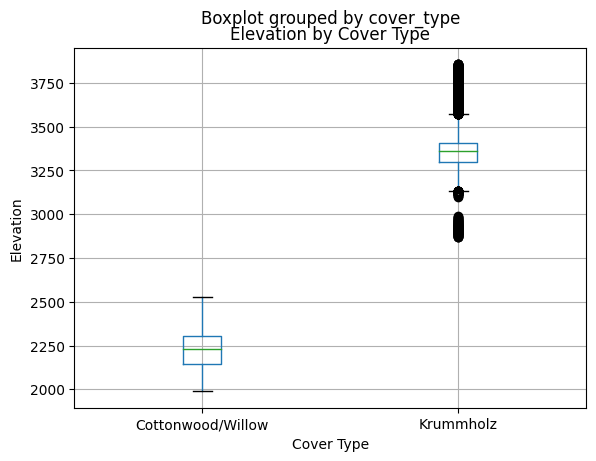

In [12]:
df_selected= df[(df['cover_type'].isin(['Cottonwood/Willow', 'Krummholz']))]# we choose to use boxplot becuase it is easy to compare the level of tyor that located in same attribute
df_selected.boxplot(column='elevation', by='cover_type')
plt.title('Elevation by Cover Type')
plt.xlabel('Cover Type')
plt.ylabel('Elevation')

Text(0.5, 1.0, 'horizontal_distance_to_hydrology by Cover Type')

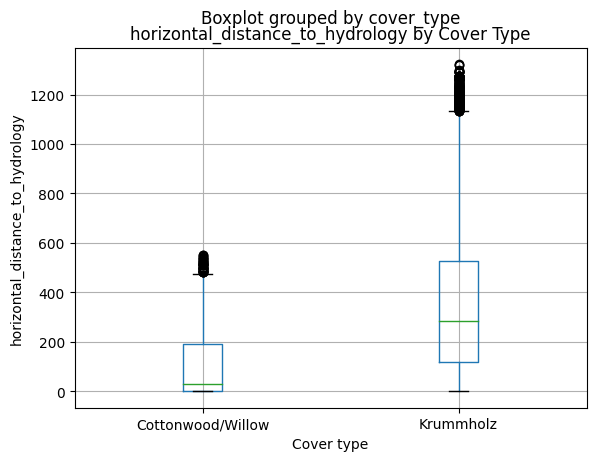

In [13]:
df_selected = df[(df['cover_type'].isin(['Cottonwood/Willow','Krummholz']))]  # we choose to use boxplot becuase it is easy to compare the level of tyor that located in same attribute
df_selected.boxplot(column='horizontal_distance_to_hydrology',by='cover_type')
plt.xlabel('Cover type')
plt.ylabel('horizontal_distance_to_hydrology')
plt.title('horizontal_distance_to_hydrology by Cover Type')

From 2 boxplotting above we are able to see that elevation is clearlify information to distinguish Krummholz and cottonwood/willow better than horizontal _distance_to_hydrologyas  becuase in elevation we are able to see that the range between two place is difference while horizontal compared to the maximum outlier. Additionally, in _distance_to_hydrology  both of the Krummholz and Cottonword have the same minimum outliner but difference maximum outliner which is difficult to distinguich in the minimum outlier.

#9. Compare the relationship between Krummholz and Cottonwood/Willow to geographical features (elevation, distance to hydrology, hillshade, etc.).

In [14]:
#hydrology column
df['before_hydrology'] = (df['horizontal_distance_to_hydrology'] * df['horizontal_distance_to_hydrology']) + (df['vertical_distance_to_hydrology'] * df['vertical_distance_to_hydrology'])
df['hydrology'] = np.sqrt(df['before_hydrology'])
#hill shade column
df['hillshade']=(df['hillshade_9am']+df['hillshade_noon']+df['hillshade_3pm'])/3

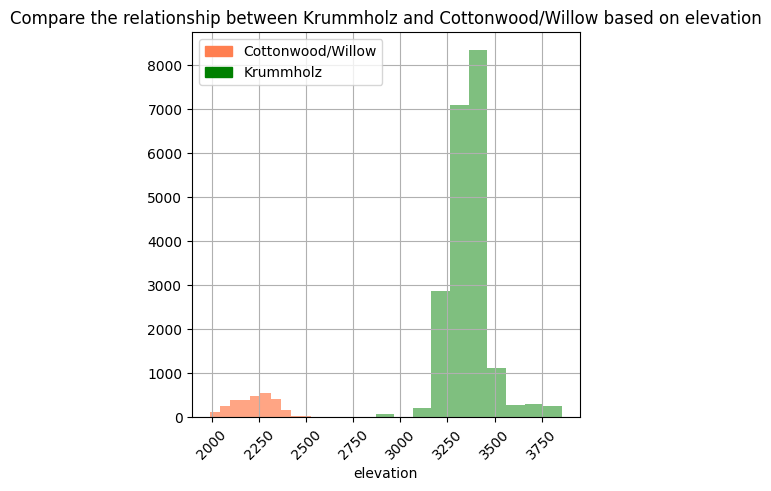

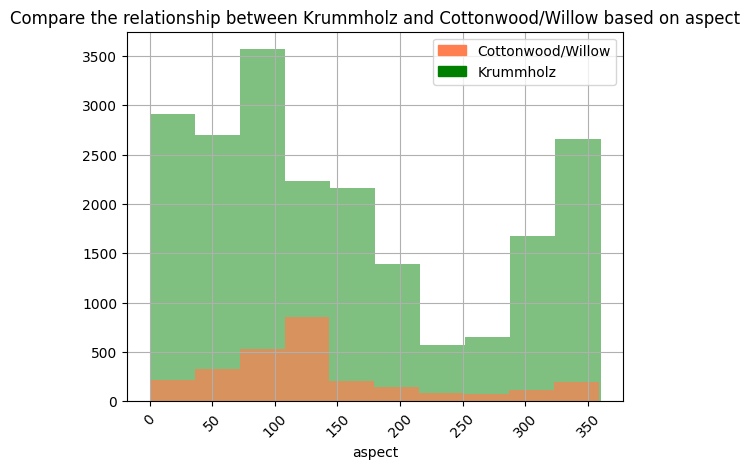

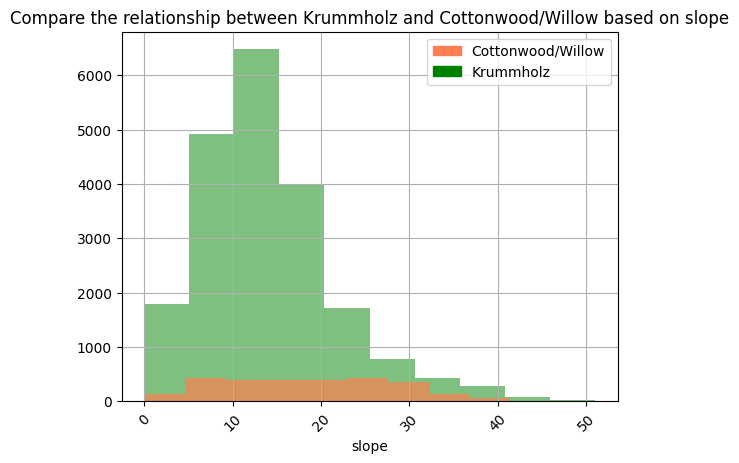

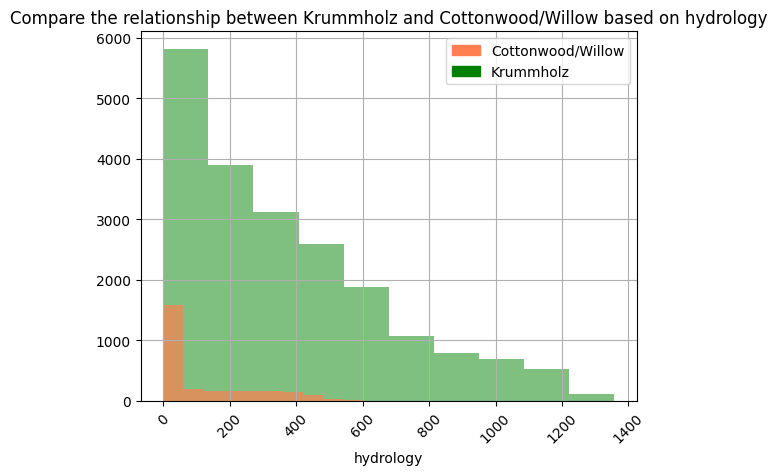

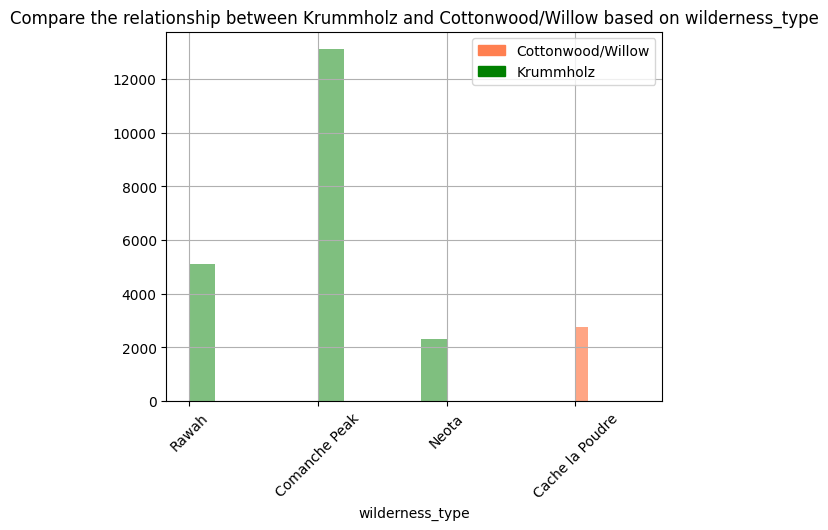

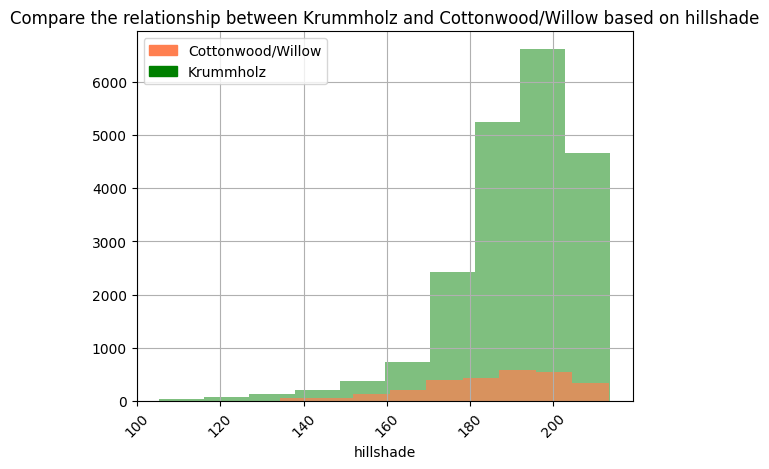

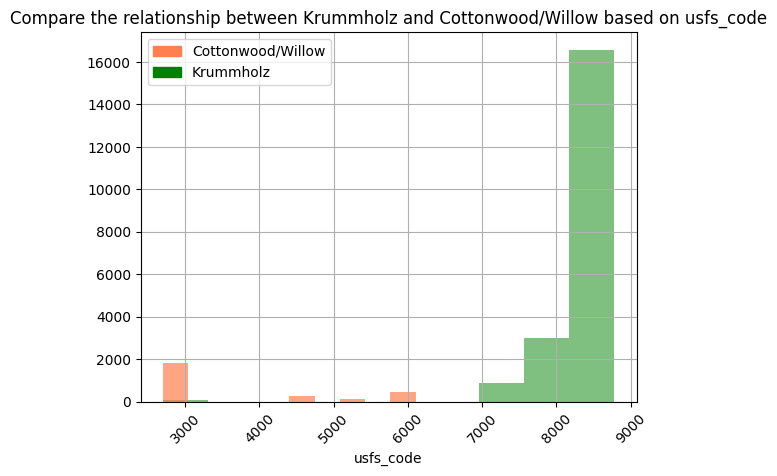

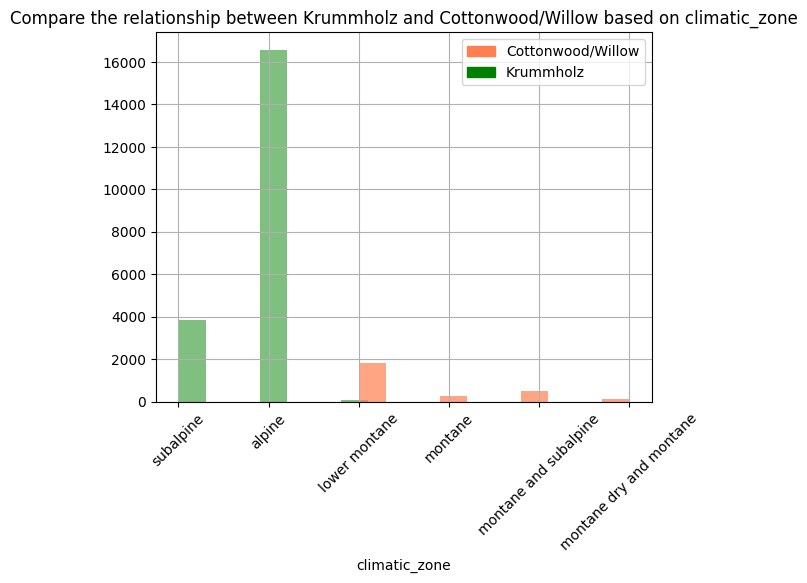

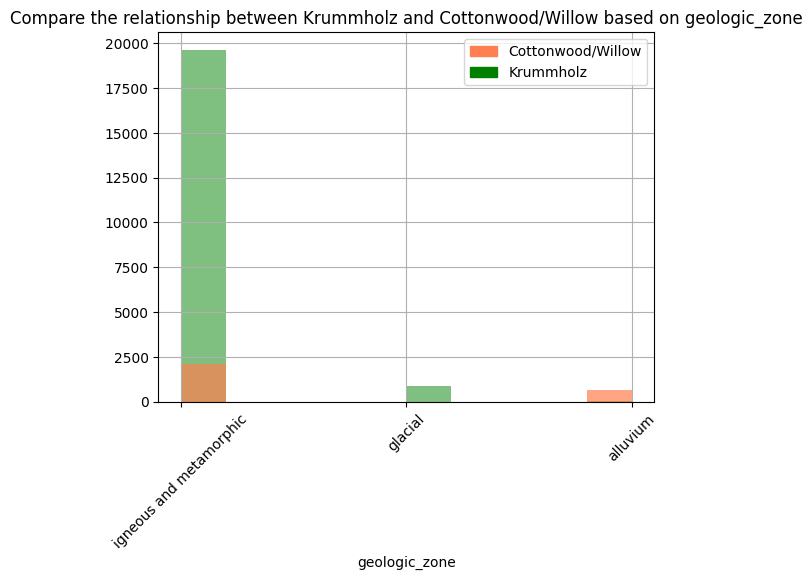

In [15]:

#compare between Krummholz and Cottonwood/Willow
df_new = df[(df['cover_type'] == 'Krummholz') | (df['cover_type'] == 'Cottonwood/Willow')]
geographical_fea = ['elevation','aspect','slope','hydrology', 'wilderness_type','hillshade','usfs_code','climatic_zone','geologic_zone']

plt.figure(figsize=(5,5))
for feature in geographical_fea:
  plt.hist(df_new[df_new['cover_type'] == 'Krummholz'][feature], color='green', alpha= 0.5, label='Krummholz')
  plt.hist(df_new[df_new['cover_type'] == 'Cottonwood/Willow'][feature], color='coral', alpha=0.7, label='Cottonwood/Willow')
  plt.title(f'Compare the relationship between Krummholz and Cottonwood/Willow based on {feature}')

  ct_patch = mpatches.Patch(color='coral', label='Cottonwood/Willow')
  Kr_patch = mpatches.Patch(color='green', label='Krummholz')
  plt.legend(handles=[ct_patch, Kr_patch])
  plt.xticks(rotation=45)
  plt.xlabel(feature)
  plt.grid()
  plt.show()

#10. Plot histogram of elevation, aspect, and slope. Discuss the shape of the distribution.

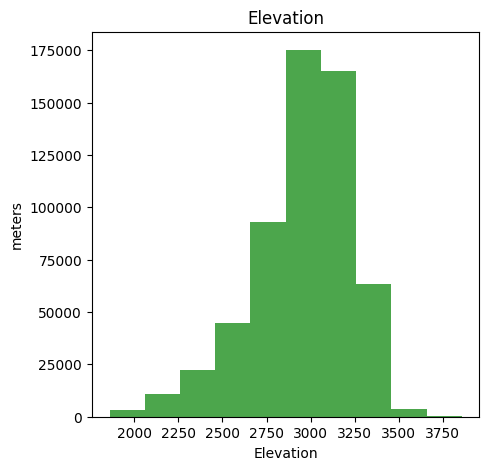

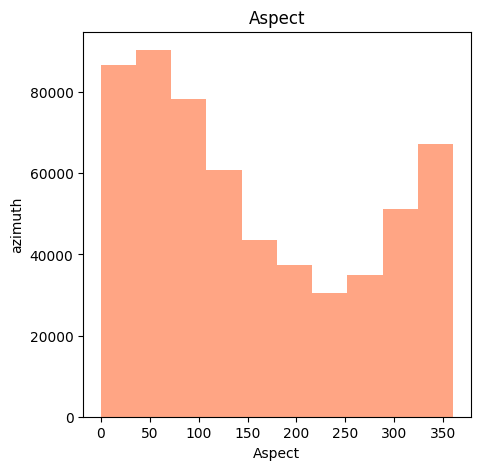

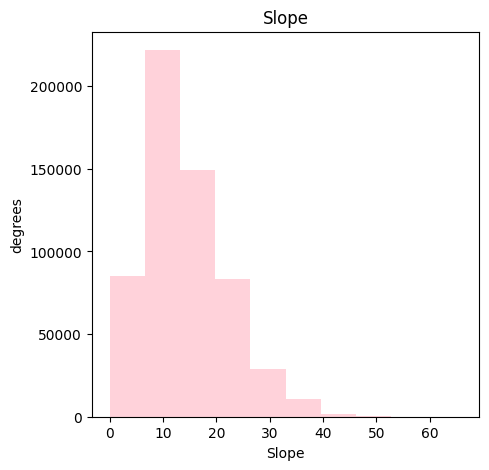

In [16]:
plt.figure(figsize=(5, 5))
plt.hist(df['elevation'],alpha=0.7,color='green')
plt.title('Elevation')
plt.xlabel('Elevation')
plt.ylabel('meters')
plt.show()

plt.figure(figsize=(5, 5))
plt.hist(df['aspect'],alpha=0.7, color='coral')
plt.title('Aspect')
plt.xlabel('Aspect')
plt.ylabel('azimuth')
plt.show()

plt.figure(figsize=(5, 5))
plt.hist(df['slope'],alpha=0.7, color ='pink')
plt.title('Slope')
plt.xlabel('Slope')
plt.ylabel('degrees')
plt.show()

Ans : For the shape of the attribute


*   Elevation : Left skewed (or Negative skewed)
*   Aspect : Non-symmetric bimodal distribution
*   Slope : Right skewed (or Positive skewed)







#11. For each member in your group, plot another useful visualization from this dataset.

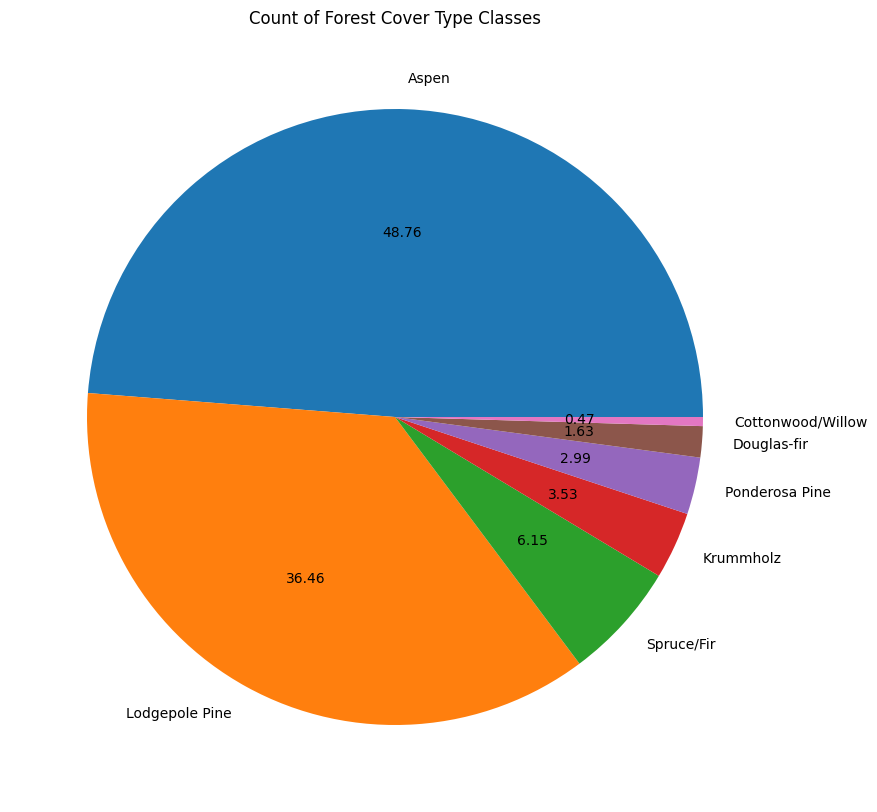

In [17]:
#Kwinyarut 3404
data_x = np.array(df['cover_type'].unique())
data_y = np.array(df['cover_type'].value_counts())

plt.figure(figsize=(10, 10))
plt.title("Count of Forest Cover Type Classes")
plt.pie(data_y, labels = data_x, autopct='%.2f')
plt.show()

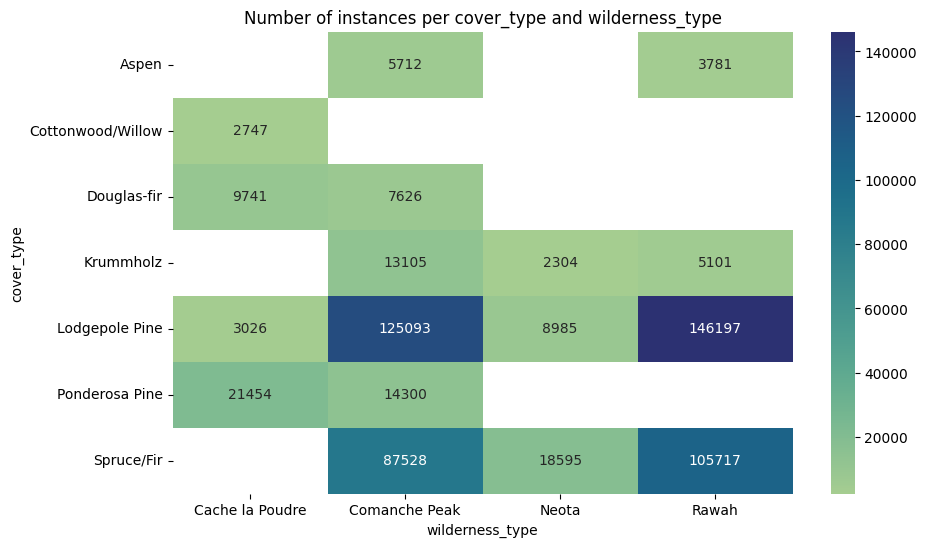

In [18]:
#Chitsanupong 3412
#Number of instances per cover_type and wilderness_type
stack = df.groupby(["cover_type", "wilderness_type"]).size().unstack()

plt.figure(figsize=(10, 6))
sns.heatmap(stack, cmap='crest', annot=True, fmt=".0f", cbar=True)
plt.title('Number of instances per cover_type and wilderness_type')
plt.xlabel('wilderness_type')
plt.ylabel('cover_type')
plt.show()

Text(0.5, 1.0, ' Amout of each climatic_zone')

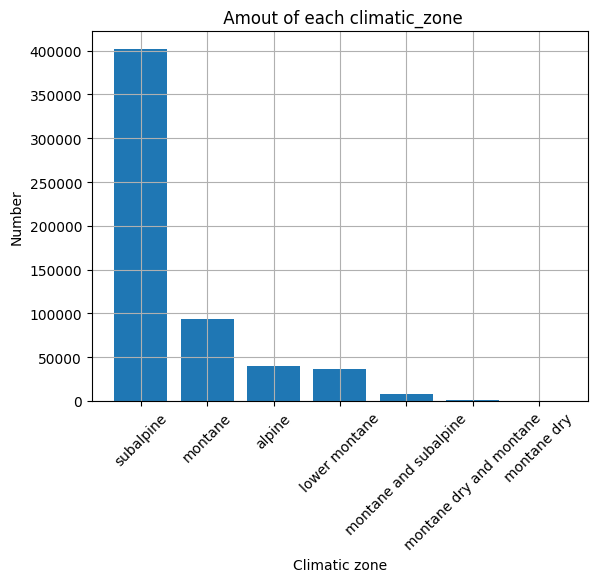

In [19]:
#Nan Aye Myint Kyi 3420
clim = df['climatic_zone'].value_counts()
climn = df['climatic_zone'].value_counts().index
plt.bar(climn,clim)
plt.xlabel('Climatic zone')
plt.ylabel('Number')
plt.xticks(rotation=45)
plt.grid()
plt.title(" Amout of each climatic_zone")

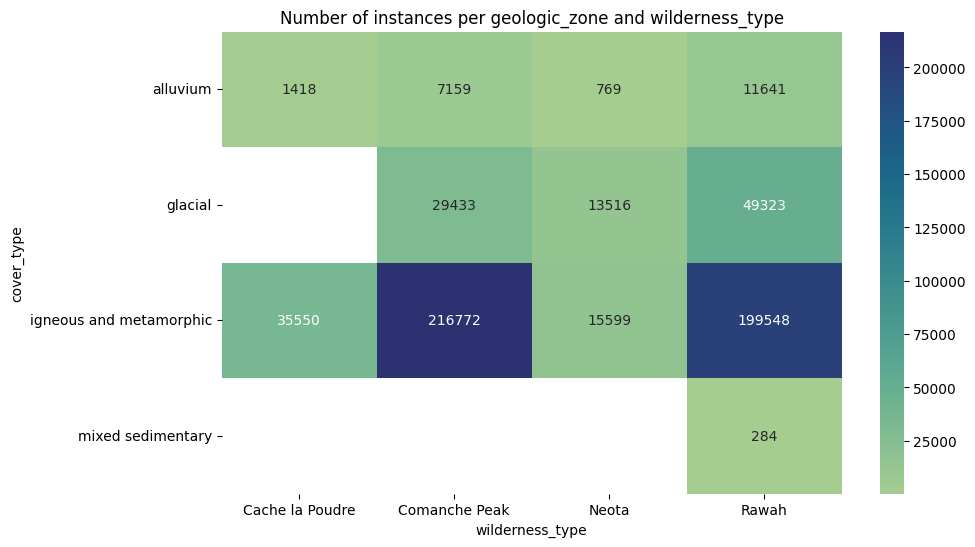

In [20]:
#Yuil 3480
#sns.set_theme(style="whitegrid", palette="muted")

# Draw a categorical scatterplot to show each observation
#ax = sns.swarmplot(data=df, x="slope", y="geologic_zone", hue="cover_type")
#ax.set(ylabel="")
#Yuil 3480
stack = df.groupby(["geologic_zone", "wilderness_type"]).size().unstack()

plt.figure(figsize=(10, 6))
sns.heatmap(stack, cmap='crest', annot=True, fmt=".0f", cbar=True)
plt.title('Number of instances per geologic_zone and wilderness_type')
plt.xlabel('wilderness_type')
plt.ylabel('cover_type')
plt.show()